# Статистика, прикладной поток
## Практическое задание 4

В данном задании вы потренируетесь работать с библиотекой pandas, посмотрите на свойства робастных оценок, а также реализуете приближенный поиск оценок максимального правдоподобия.

**Правила:**

* Дедлайн **5 ноября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[applied] Фамилия Имя - задание 4"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `4.N.ipynb` и `4.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 -  20 баллов **O3**
* Задача 2 -  7 баллов **O3**
* Задача 3 -  5 баллов **O3**
* Задача 4 -  15 баллов **O2**
* Задача 5 -  15 баллов **O3**
* Задача 6 -  5 баллов **O3**

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

__________________
### Задача 1. Yelp

Yelp (yelp.com) — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате json можно посмотреть по ссылке
https://www.kaggle.com/yelp-dataset/yelp-dataset/data

_____________

**Задача:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. Пример с несколько другой задачей: https://yandex.ru/company/researches/2017/msk_mobile_map
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [560]:
yelp_business = pd.read_csv('yelp_business.csv')
yelp_business.head()

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. Для этого стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`. В таблице должен быть указан город (название) и количество компаний в этом городе.

In [561]:
df  = yelp_business.groupby('city').count().sort_values(
                        by='business_id', ascending=False).head()
df.loc[:, 'business_id']

city
Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
Name: business_id, dtype: int64

Пусть N -- город с наибольшим количеством компаний.

Оставьте в таблице только записи, соответствующие городу N. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ -- долготу.

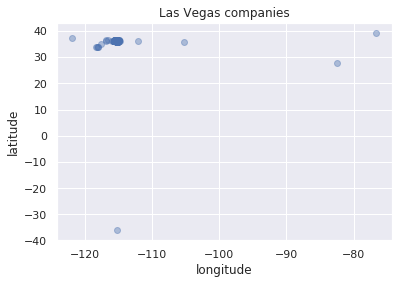

In [562]:
yelp_business = yelp_business[yelp_business.city == 'Las Vegas']

plt.figure()
plt.title('Las Vegas companies')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.scatter(yelp_business.longitude, yelp_business.latitude, alpha=0.4)
plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города N и сравните ее с построенным графиком.

При желании вы можете разобраться с тем, как автоматически подгружать карту города в качестве фона графика.

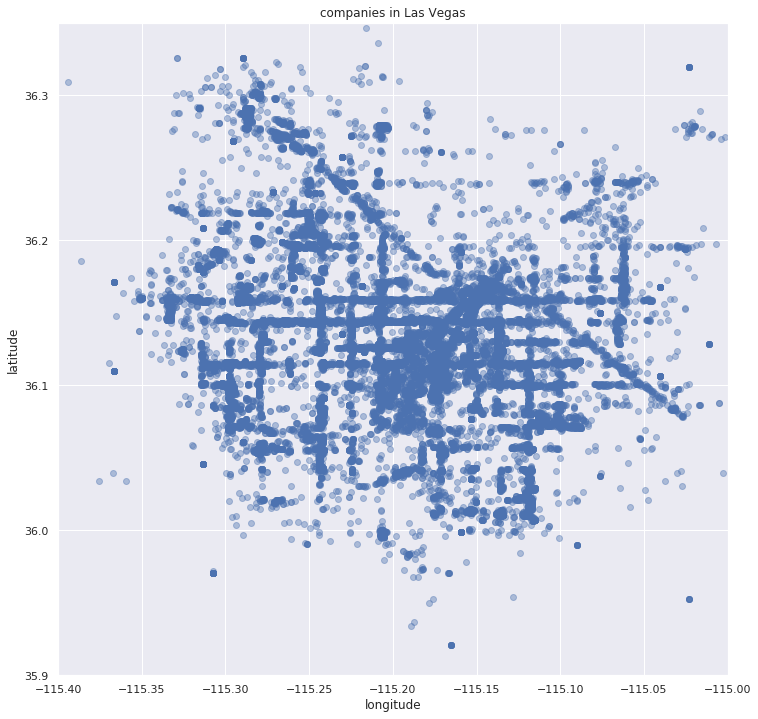

In [563]:
plt.figure(figsize=(12,12))
plt.title('companies in Las Vegas')
plt.xlim((-115.4, -115))
plt.ylim((35.9, 36.35))
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.scatter(yelp_business.longitude, yelp_business.latitude, alpha=0.4)
plt.show()

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [564]:
review = pd.read_csv('yelp_review.csv')
review.head()

,Unnamed: 0,business_id,stars
0,0,AEx2SYEUJmTxVVB18LlCwA,5
1,1,VR6GpWIda3SfvPC-lg9H3w,5
2,2,CKC0-MOWMqoeWf6s-szl8g,5
3,3,ACFtxLv8pGrrxMm6EgjreA,4
4,4,s2I_Ni76bjJNK9yG60iD-Q,4


В подгруженной таблице оценок оставьте только компании города N.
Для этого воспользуйтесь функцией `np.in1d(x, y)`, которая вернет массив того же размера, что и `x`, а на $i$-м месте будет `True`, если элемент `x[i]` встречается в `y`.

*Внимание!* Такая операция может выполняться довольно долго. После выполнения операции можно сохранить ее результат в файл, чтобы в дальнейшем не выполнять ее заново.

In [565]:
mod_rev = pd.concat([review.business_id, yelp_business.business_id], 
                                ignore_index=True).astype('category')

In [566]:
review[np.in1d(mod_rev.cat.codes[:review.business_id.shape[0]], 
mod_rev.cat.codes[review.business_id.shape[0]:])].to_csv('las_vegas_review.csv')

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [567]:
lv_review = pd.read_csv('las_vegas_review.csv')
lv_review = lv_review.iloc[:,2:]
lv_review = lv_review.groupby('business_id').aggregate([np.mean, np.size])

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы.

In [568]:
lv_review.columns = ['mean star','count of stars']
lv_review.head()

,mean star,count of stars
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19


Соедините две полученные ранее таблицы по компаниям города N в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index` (в одной из них это уже должно было быть сделано).
Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

In [569]:
yelp_business.set_index('business_id', inplace=True)

In [570]:
lv_yelp_merged = pd.merge(lv_review, yelp_business, 
                             how='inner', on='business_id').loc[:,
                ['latitude', 'longitude', 'categories', 'name', 'mean star', 'count of stars']]

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

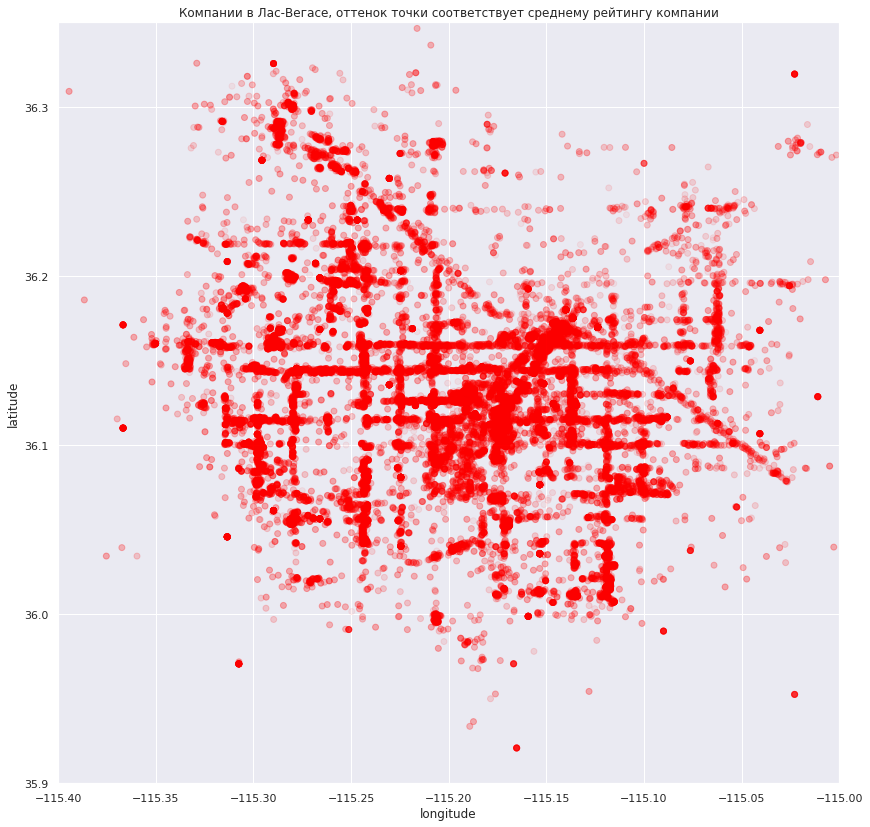

In [571]:
alphas = 0.3*lv_yelp_merged['mean star']/5
rgba_colors = np.zeros((len(lv_yelp_merged), 4))

rgba_colors[:,0] = 1
rgba_colors[:, 3] = alphas

plt.figure(figsize=(14,14))

plt.title('Компании в Лас-Вегасе, оттенок точки соответствует\
 среднему рейтингу компании')

plt.xlim((-115.4, -115))
plt.ylim((35.9, 36.35))
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.scatter(lv_yelp_merged.longitude, lv_yelp_merged.latitude, color=rgba_colors)

plt.show()

Чтобы получить районы города, округлите значения широты и долготы, подобрав оптимальный размер района. Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений -- оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

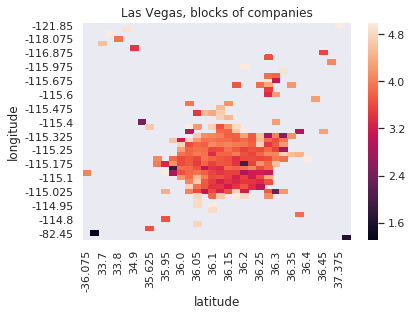

In [572]:
temp_lv_yelp = lv_yelp_merged
temp_lv_yelp.longitude = np.round(temp_lv_yelp.longitude*4, decimals=1)*0.25
temp_lv_yelp.latitude = np.round(temp_lv_yelp.latitude*4, decimals=1)*0.25

lv_pivot = pd.pivot_table(temp_lv_yelp, index=['longitude'], 
                    columns=['latitude'], values='mean star', aggfunc=np.mean)
ax = plt.axes()

sns.heatmap(lv_pivot, ax=ax)
ax.set_title('Las Vegas, blocks of companies')
plt.show()

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** Потому что если в районе например одна компания, то по отзывам одной компании мы невольно будем составлять мнение о целом районе, хотя компания вполне может оказаться специфичной, со специфичными услугами, и т.д., что конечно может помешать правильно анализировать. И такой район на графике не отличим от района с десятками компаний, и если у района с одной компанией очень хорошие отзывы, можно подумать что этот район гораздо лучше другого (на деле просто более популярного), то есть мы будем неверно интерпретировать информацию.
Также если цветовая шкала лежит от макс. значения оценки до мин., то это плохо, так как например если на каком-то районе всего один отзыв - 5.0, то это отразится на всей шкале, и она сместится, из-за этого остальные компании будут казаться хуже судя по шкале, хотя на цифрах они будут не такими уж и плохими.

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

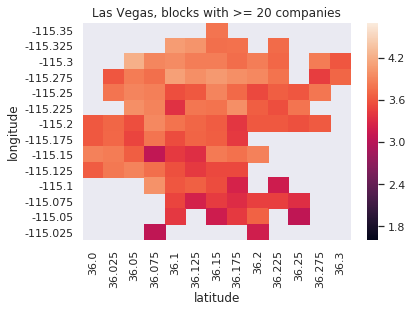

In [149]:
g = temp_lv_yelp.groupby(by=['latitude','longitude']).count()
g=(g[g.name >= 30]).loc[:,['name']]
g.columns = ['size']
temp_lv_yelp_mod = pd.merge(g, temp_lv_yelp, how='inner', 
                            on=['latitude','longitude'])
lv_pivot = pd.pivot_table(temp_lv_yelp_mod, index=['longitude'], 
            columns=['latitude'], values='mean star', aggfunc=np.mean)

ax = plt.axes()

sns.heatmap(lv_pivot, vmin=1.6, vmax=4.7, ax=ax)
ax.set_title('Las Vegas, blocks with >= 20 companies')

plt.show()

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** На новом графике отсутствуют все "выбросы", то есть компании-одиночки, расположенные вне города? но пренадлежащие ему, а здесь изображены районы только самого города. Кроме того цветовая гамма стала более равномерной и нерезкой, ичсез большой контраст в клетках(очень белые или очень темные). Значит, проблема, описанная в предыдущем графике, действительно исчезла.

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `Restaurant`. Составьте таблицу, в которой будет информация о всех ресторанах города N, для которых имеется не менее $5$ отзывов. Далее постройте график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

/home/ilya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


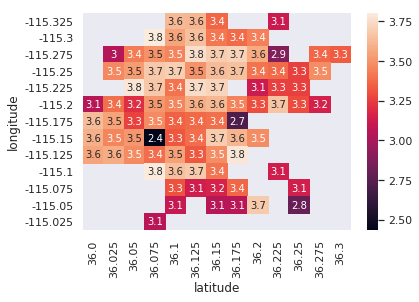

In [199]:
restaurants=lv_yelp_merged[lv_yelp_merged.categories.str.contains("Restaurant")]
restaurants=restaurants[restaurants["count of stars"] >= 5]

restaurants.longitude = np.round(restaurants.longitude*4, decimals=1)*0.25
restaurants.latitude = np.round(restaurants.latitude*4, decimals=1)*0.25

g = restaurants.groupby(by=['latitude','longitude']).count()
g=(g[g.name >= 10]).loc[:,['name']]
g.columns = ['size']

restaurants_mod = pd.merge(g, restaurants, how='inner', on=['latitude','longitude'])


lv_pivot = pd.pivot_table(restaurants_mod, index=['longitude'], columns=['latitude'], 
                values='mean star', aggfunc=np.mean)

sns.heatmap(lv_pivot, annot=True)

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:**
Чтобы понять о что-то качестве ресторана, хотелось бы видеть много отзывов об этом месте, иначе по одному-двум отзывам нельзя составить полную картину качества ресторана. Количество ресторанов в районе может интересовать, чтобы например выбрать в каком районе остановиться туристу, ведь нужно, чтобы как можно больше хороших заведений было в близкой доступности. Да и впринципе, количество ресторанов в районе может много сказать о популярности этой части города, о том как много людей в этом районе проводят свободное время.

Кот Василий из таблицы с баллами очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [211]:
rest_for_vasil = lv_yelp_merged[lv_yelp_merged.categories.str.contains("Restaurant")]
rest_for_vasil = rest_for_vasil[rest_for_vasil["count of stars"] >= 50]
rest_for_vasil = rest_for_vasil.sort_values(by='mean star', ascending=False)
rest_for_vasil[:10].loc[:, ['name', 'mean star', 'count of stars', 'latitude', 'longitude']]

,name,mean star,count of stars,latitude,longitude
business_id,,,,,
iBPyahdJRP5y0t25fF2W9w,"""Lip Smacking Foodie Tours""",4.966480,179,36.125,-115.175
Fmij544FE1iOruoxI41kew,"""Pepito Shack""",4.907692,65,36.150,-115.150
qw9SyduMZ53KB6GlBQqvZQ,"""Bosa Boba Cafe""",4.890909,55,36.125,-115.175
k9b96JXlNewj36ddrce9Jw,"""Garden Grill""",4.868132,91,36.175,-115.275
IhNASEZ3XnBHmuuVnWdIwA,"""Brew Tea Bar""",4.848069,1165,36.050,-115.250
k5ddmLvAKKw9zSusRPM2cQ,"""Poppa Naps BBQ""",4.836538,104,36.125,-115.100
8fFTJBh0RB2EKG53ibiBKw,"""Zenaida's Cafe""",4.833333,180,36.100,-115.100
l1GJnB9TJgGgEeI4at1M0A,"""El Frescos Cocina Mexicana""",4.816754,191,36.100,-115.150
hFT3HuxVZJb1uYEsYfp-0A,"""Blaqcat Ultra Hookah Lounge""",4.809524,63,36.150,-115.225


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

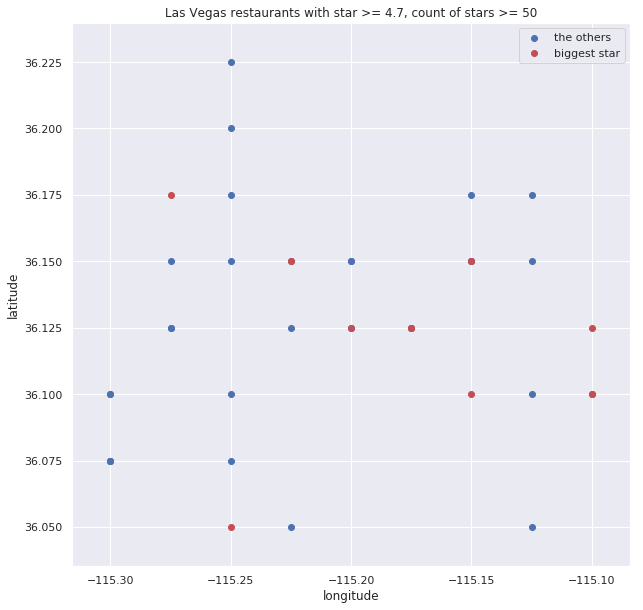

In [227]:
rest_for_vasil = rest_for_vasil[rest_for_vasil['mean star'] >= 4.7]

plt.figure(figsize=(10,10))

plt.title('Las Vegas restaurants with star >= 4.7, count of stars >= 50')
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.scatter(rest_for_vasil[10:].longitude, rest_for_vasil[10:].latitude, 
                                        c='b', label='the others')
plt.scatter(rest_for_vasil[:10].longitude, rest_for_vasil[:10].latitude, 
                                        c='r', label='biggest star')

plt.legend()

plt.show()


Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** Кот Василий довольно капризен, но тем не менее он сможет найти ресторан в соответствии со своими требованиями. 
Можно отметить, что на примере данной задачи мы увидели, что pandas обладает широким спектром возможностей для анализа данных. В нем зашито множество полезных методов, в том числе и sql-подобных, которые позволяют удобно соотносить различные данные и извлекать из нее информацию. Кроме того, мы увидели несколько полезных методов из библиотеки seaborn, которая позволяет удобно визуализировать предоставленную информацию, что  , конечно, тоже полезно для анализа. 

__________________
### Задача 2. Airquality

Загрузите с помощью `pandas` из файла `airquality.csv` данные о качестве воздуха в Нью-Йорке с мая по сентябрь 1973 года по дням. Данные содержат измерения нескольких величин, описания которых можно прочитать по ссылке https://www.rdocumentation.org/packages/datasets/versions/3.5.1/topics/airquality

In [228]:
airquality = pd.read_csv('airquality.csv')

airquality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


Выведите описательные статистики (метод `describe`)

In [233]:
airquality.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:** Выбросы в данных видимо присутствуют, так как например в колонке Ozone выборочное среднее существенно больше медианы, что свидетелсьтвует о смещении этого признака вправо, а в колонке Solar.R ситуация наоборот, смещение происходит в сторону меньших значений.

Для каждого параметра постройте график ящиков с усами (boxplot), в котором ось $x$ соответствует номеру месяца, а ось $y$ --- значениям параметра (т.е. свой ящик для каждого месяца). Используйте функцию `seaborn.boxplot`.

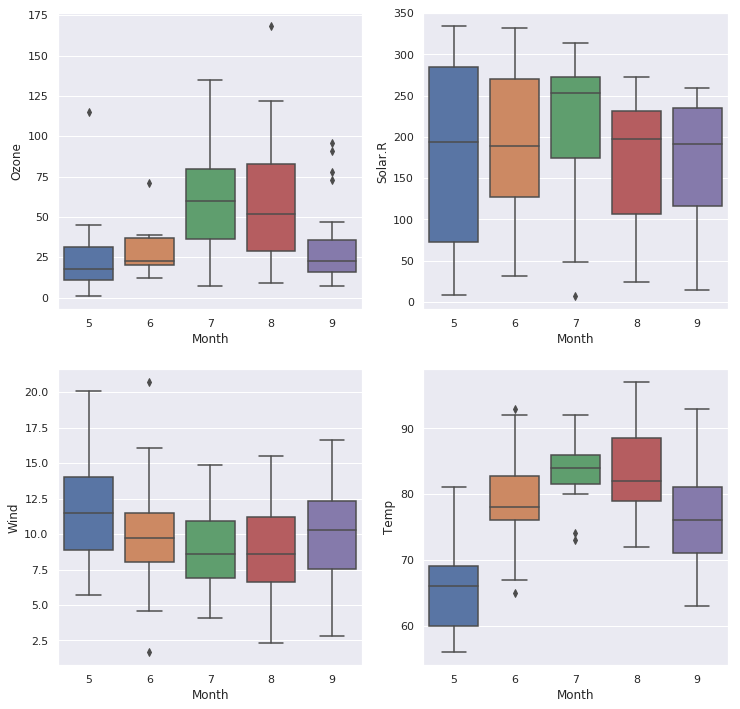

In [255]:
plt.figure(figsize=(12,12))

for ind, column in enumerate(airquality.columns[:4]):
    ax = plt.subplot(2, 2, ind+1)
    sns.boxplot(x='Month', y=column, data=airquality, ax=ax)



Какую информацию показывают ящики с усами? Какие выводы можно сделать в данном случае?

**Ответ:** 
Ящики с усами показывают, медиану, первый и третий квартиль, и минимальное и максимальное значение, также возможные выбросы. Мы видим, что есть некоторые данные признаны выбросами, кроме того, мы также видим, что зачастую данные расположены не "симметрично" (в том смысле что вес хвоста начала данных отличается от веса хвоста конца данных).

Для параметра с наибольшим числом наблюдений, признанных выбросами, сравните значения выборочного среднего, выборочной медианы и медианы средних Уолша.

In [296]:
print("sample mean : ", airquality.Ozone.dropna().mean())
print("sample median : ", airquality.Ozone.dropna().median())

def walsh_median(series):
    X, Y = np.meshgrid(series, series)
    Walsh = np.tril((X + Y )/2)
    return np.median(Walsh[Walsh != 0])
    
print("The median of the Walsh : ", walsh_median(airquality.Ozone.dropna()))

sample mean :  42.12931034482759
sample median :  31.5
The median of the Walsh :  38.5


При подсчете этих статистик обычно предполагается, что наблюдения независимы. Выполено ли это свойство в данном случае?

**Ответ:** Наверное свойство независимости наблюдений не совсем выполнено, поскольку данные по Озону записывается ежедневно, и вполне возможно, что его значение в текущем дне может зависеть от значений предыдущих дней.
    
**Вывод:** Мы посчитали некоторые оценки для данных, в которых присутствует определенное количество выбросов. Мы знаем, что эти оценки имеют разную асимптотическую толерантность, то есть разную устойчивость к выбросам, и заметили что эти оценки довольно существенно отличаются друг от друга. Здесь  мы видим, что на основе этих оценок мы пока вряд ли можем сказать, как ведут себя данные, видимо нужно больше разобраться в этих данных, в их природе, чтобы понять сколько выбросов и обнаружить какие-то закономерности в их распределении.

__________________
### Задача 3. Laplace

Предлагается изучить некоторые свойства распределения Лапласа с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{2} e^{- |x - \theta|}$.

**1.** На отрезке $[-4, 4]$ постройте плотность стандартного нормального распределения и стандартного распределения Лапласа ($\theta = 0$). Не забудьте добавить легенду.

**Решение:**

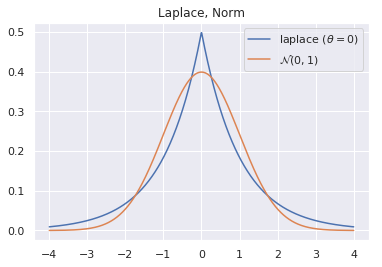

In [299]:
grid = np.linspace(-4, 4, 1000)
plt.figure()

plt.title('Laplace, Norm')

plt.plot(grid, sps.laplace.pdf(grid), label=r'laplace $(\theta = 0)$')
plt.plot(grid, sps.norm.pdf(grid), label=r'$\mathcal{N}(0,1)$')

plt.legend()
plt.show()

**Вывод:**  Здесь мы видим что распределение Лапласа довольно схоже с нормальным, только у Лапласа более тяжелые хвосты, то есть оно допускает большие отклонения от среднего

**2.** 
Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, $0 < \alpha < 1/2$, для распределения Лапласа. Помочь в ее вычислении может теорема, упомянутая на лекциях.

Является ли эта функция монотонной? Найдите пределы функции при $\alpha \to+ 0$ и $\alpha \to 1/2 - 0$. Сравните со значениями асимптотической дисперсии для выборочного среднего и выборочной медианы (не забудьте отметить их на графике). Сделайте вывод.

**Решение:**

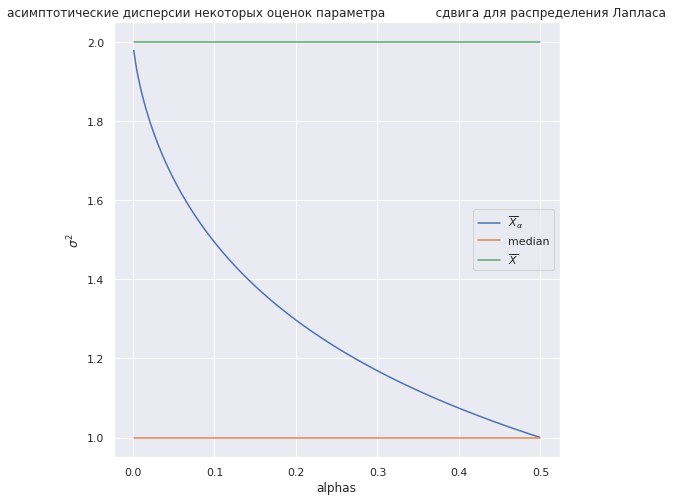

In [307]:
def f(alpha):
    qs = sps.laplace.ppf(1-alpha)
    return (2/(1-2*alpha)**2)*(1-1/2*np.exp(-qs)*(qs**2+2*qs+2)+alpha*qs**2)

alpha = np.linspace(0.001, 0.499, 1000)


plt.figure(figsize=(8, 8))

plt.title("асимптотические дисперсии некоторых оценок параметра \
            сдвига для распределения Лапласа")
plt.xlabel('alphas')
plt.ylabel(r'$\sigma^2$')

plt.plot(alpha, f(alpha), label=r'$\overline{X}_{\alpha}$')
plt.plot(alpha, np.ones(len(alpha)), label='median')
plt.plot(alpha, 2*np.ones(len(alpha)), label=r'$\overline{X}$')

plt.legend()

plt.show()

**Вывод:** Эта функция монотонно убывает. Пределы $\sigma^2_\alpha \to 2$ при $\alpha \to +0$ ;  $\sigma^2_\alpha \to 1$ при $\alpha \to 0.5 - 0$. Причем эти пределы совпадают  со значениями асимптотических дисперсий соответственно $\overline{X}$ и $\widehat{\mu}$. Это говорит нам о том, что выборочное среднее и выборочная медиана является естественным продолжением усеченного среднего на ,так сказать, экстремальные случаи, при $\alpha = 0$ и $\alpha = 1/2$.

**3.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Лапласа. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\widehat{\mu}$ —  выборочная медиана;
- $W$ — медиана по всем значениям $Y_{ij} = \frac{X_i + X_j}{2}, 1 \leq i \leq j \leq n$ — медиана средних Уолша.

На одном графике изобразите зависимость значений этих оценок от $n$. Настройте видимую область графика по оси y так, чтобы четко была отображена информативная часть графика.  Сделайте вывод.

**Решение: **

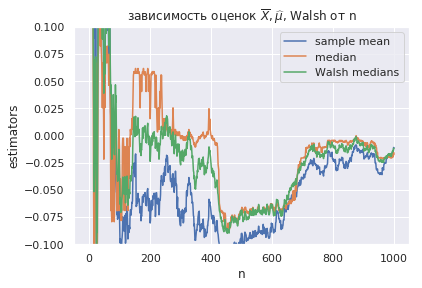

In [322]:
xs = sps.laplace.rvs(size=1000)

grid = np.linspace(1,1000,1000)

sample_means = np.cumsum(xs)/grid

sample_medians = pd.Series(xs).expanding().median()

walsh_medians = [walsh_median(xs[:i+1]) for i in range(len(xs))]



plt.figure()

plt.title(r"зависимость оценок $\overline{X}, \widehat{\mu}$, Walsh от n")
plt.ylim((-0.1, 0.1))
plt.xlabel('n')
plt.ylabel('estimators')
plt.plot(grid, sample_means, label='sample mean')
plt.plot(grid, sample_medians, label='median')
plt.plot(grid, walsh_medians, label='Walsh medians')

plt.legend()

plt.show()


**Вывод:** Здесь мы наблюдаем, что все эти оценки сходятся к 0, то есть к параметру сдвига, что подтверждает теоритические утверждения. Здесь мы видим, что сходимость этих оценок довольно медленная, что скорее всего происходит из-за более тяжелых хвостов в распределении Лапласа, чем например у нормального. 

__________________
### Задача 4. Gamma-cats (Cauchy)

Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi (1 + (x- \theta)^2)}$.

*Замечание:* Такое распределение встречается, к примеру, в следующей задаче. На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

**Решение:**

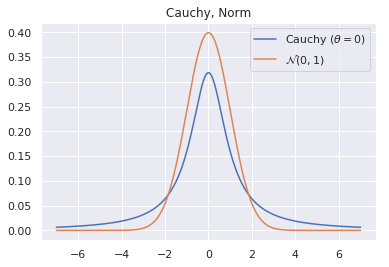

In [323]:

grid = np.linspace(-7, 7, 1000)
plt.figure()

plt.title('Cauchy, Norm')

plt.plot(grid, sps.cauchy.pdf(grid), label=r'Cauchy $(\theta = 0)$')
plt.plot(grid, sps.norm.pdf(grid), label=r'$\mathcal{N}(0,1)$')

plt.legend()
plt.show()

**Вывод:** Здесь мы видим, что Коши также симметричное распределение, но оно имеет еще более тяжелые хвосты, чем нормальное, что свидетельствует о большом разбросе в данных (относительно своей медианы).

**2.** 
Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, $0 < \alpha < 1/2$, для распределения Коши. Помочь в ее вычислении может теорема, упомянутая на лекциях.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте минимум функции.

**Решение:**

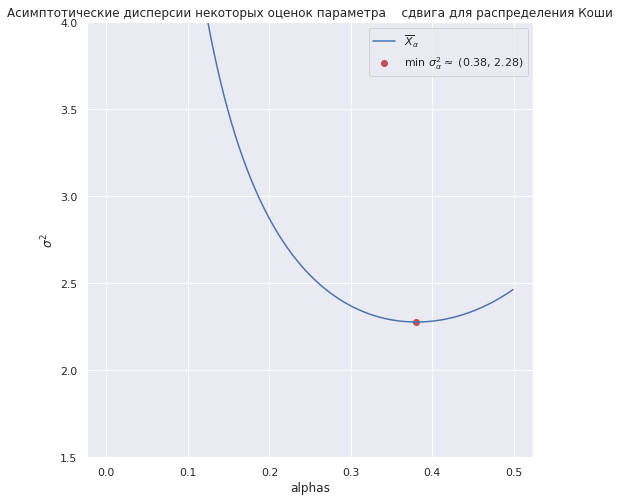

In [338]:
def f(alpha):
    qs = sps.cauchy.ppf(1-alpha)
    return (2/(1-2*alpha)**2)*((qs - np.arctan(qs))/np.pi + alpha*qs**2)

alpha = np.linspace(0.001, 0.499, 10000)


plt.figure(figsize=(8, 8))

plt.title("Асимптотические дисперсии некоторых оценок параметра\
    сдвига для распределения Коши")
plt.xlabel('alphas')
plt.ylabel(r'$\sigma^2$')

plt.ylim(1.5,4)

min_f = min(f(alpha))
min_arg = alpha[np.argmin(f(alpha))]

plt.plot(alpha, f(alpha), label=r'$\overline{X}_{\alpha}$')
plt.scatter(min_arg, min_f, c='r',
label=r'min $\sigma^2_\alpha \approx$ (%.2f, %.2f)' % (min_arg, min_f))

plt.legend()

plt.show()

При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна?

**Ответ: ** При $\alpha \approx 0.38$  дисперсия минимальна и равна $\approx 2.28$

**3.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\overline{X}_{\alpha}$ —  усеченное среднее, где $\alpha$ &mdash; значение, на котором достигается минимум $\sigma^2_{\alpha}$;
- $\widehat{\mu}$ —  выборочная медиана;
- $W$ — медиана по всем значениям $Y_{ij} = \frac{X_i + X_j}{2}, 1 \leq i \leq j \leq n$ — медиана средних Уолша;

а также, по каждой из этих оценок, одношаговую оценку.

**Напоминание: ** если $\widehat{\theta}_0$ — асимптотически нормальная оценка, то одношаговая оценка $\widehat{\theta}_1$ вычисляется как $\widehat{\theta}_1 = \widehat{\theta}_0 - \left(l''_X(\widehat{\theta}_0) \right)^{-1} l'_X(\widehat{\theta}_0)$, где $l_X(\theta)$ — логарифмическая функция правдоподобия. Заметим, что обычное выборочное среднее не является асимптотически нормальной оценкой, и оценка, вычисленная по формуле выше, формально не является одношаговой, однако ее все равно требуется посчитать.

На одном графике изобразите зависимость значений этих оценок от $n$. Для каждой оценки $\widehat{\theta}_0$ соответствующая оценка $\widehat{\theta}_1$ должна быть изображена на графике пунктиром тем же цветом, что и $\widehat{\theta}_0$. Сделайте вывод.

**Замечание: ** если некоторые оценки имеют большой разброс, и разница между графиками зависимостей оценок с малыми значениями недостаточно заметна, стоит сделать два графика, на одном из которых будут изображены все оценки, а на втором &mdash; только достаточно хорошие.

**Решение: **

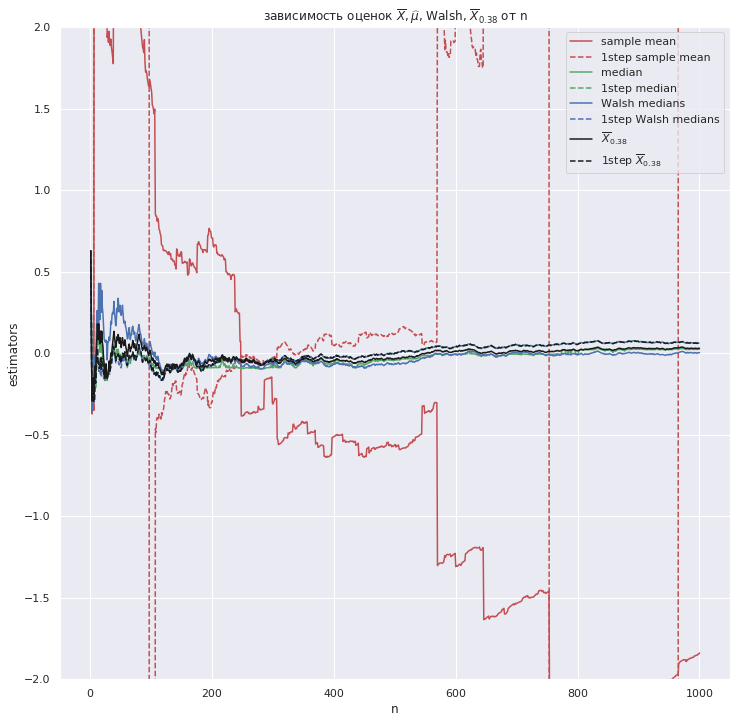

In [400]:
def one_step(X, theta):
    theta1 = list()
    for i in range(1, len(X) + 1):
        l1 = ((X[:i] - theta[i-1])/(1 + (X[:i] - theta[i-1])**2)).sum()
        l2=(((X[:i]-theta[i-1])**2 - 1)/(1 + (X[:i]-theta[i-1])**2)**2).sum()
        theta1.append(theta[i-1] - l1/l2)
    return theta1 


def get_plot_1st(grid, values, label, c):
    global xs
    plt.plot(grid, values, label=label, c=c)
    plt.plot(grid, one_step(xs, values), label='1step ' + label, 
                                 linestyle='--', c=c)

xs = sps.cauchy.rvs(size=1000)
grid = np.linspace(1,1000,1000)

sample_means = np.cumsum(xs)/grid

sample_medians = pd.Series(xs).expanding().median()

walsh_medians = [walsh_median(xs[:i+1]) for i in range(len(xs))]

truncated_mean=[sps.trimboth(xs[:i], 0.38).mean() for i in range(1, len(xs) + 1)]

plt.figure(figsize=(12, 12))

plt.title(r"зависимость оценок $\overline{X}, \widehat{\mu}$, Walsh,\
 $\overline{X}_{0.38}$ от n")
plt.ylim((-2, 2))
plt.xlabel('n')
plt.ylabel('estimators')
get_plot_1st(grid, sample_means, label='sample mean', c='r')
get_plot_1st(grid, sample_medians, label='median', c='g')
get_plot_1st(grid, walsh_medians, label='Walsh medians', c='b')
get_plot_1st(grid, truncated_mean, label=r'$\overline{X}_{0.38}$', c='k')

plt.legend()

plt.show()

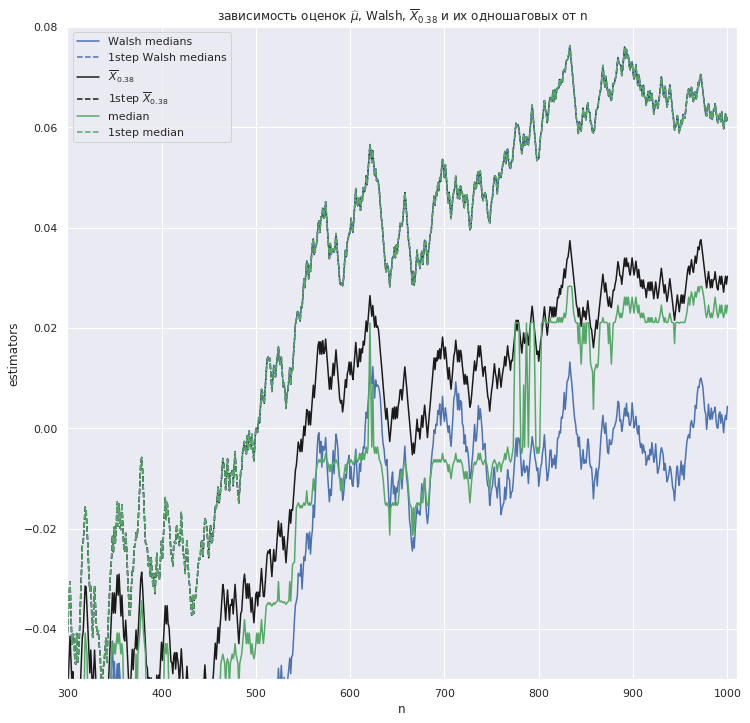

In [403]:
#теперь только хорошие оценки

plt.figure(figsize=(12, 12))

plt.title(r"зависимость оценок $\widehat{\mu}$, Walsh,\
 $\overline{X}_{0.38}$ и их одношаговых от n")
plt.xlim((300,1010))
plt.ylim((-0.05, 0.08))
plt.xlabel('n')
plt.ylabel('estimators')

get_plot_1st(grid, walsh_medians, label='Walsh medians', c='b')
get_plot_1st(grid, truncated_mean, label=r'$\overline{X}_{0.38}$', c='k')
get_plot_1st(grid, sample_medians, label='median', c='g')

# plt.plot(grid, one_step(xs,walsh_medians), c='y')
plt.legend()

plt.show()

**Вывод:** Здесь мы видим, что $\overline{X}$ - ни к чему не сходится, равно как и его одношаговая оценка, ведь действительно, мы знаем, $\overline{X}$ - имеет такое же распределение Коши, как и один элемент выборки. Выходит, что одношаговая оценка $\widehat{\theta}_1$ от не а.н.о. $\widehat{\theta}_0$ не будет давать какие то лучшие результаты. 

Что по поводу остальных оценок $\widehat{\mu}$, Walsh, $\overline{X}_{0.38}$ - они сходятся к нулю, оно и понятно, ведь они а.н.о. Мы видим, что одношаговые оценки от них также сходятся к нулю, причем зачастую эти одношаговые очень быстро начинают вести себя практически идентично. Это понятно, ведь мы знаем что одношаговая оценка от а.н.о. является также а.н.о., причем с ас. дисперсией равной $\frac{1}{i_{X}(\theta)}$, где $i_{X}(\theta)$ - информация Фишера одного наблюдения, вне зависимости от природы изначальной оценки. Поэтому они и ведут себя очень схоже.

В общем, глядя на графики можно сказать, что подвтерждаются теор. свойства для а.н.о. и одношаговых оценок.

__________________
### Задача 5. Baltic macoma (Zero-inflated Poisson)

Пуассоновское распределение обычно используется для моделирования количества событий в некоторый отрезок времени или для моделирования количества объектов в некоторой области в предположении, что события или объекты появляются случайно и независимо. В курсе случайных процессов мы изучим пуассоновские процессы и поймем их связь с экспоненциальным распределением.

Пуассоновское распределение, завышенное в нуле (zero-inflated Poisson distribution), используется для моделирования случаев, в которых наблюдается завышенное содержание нулевых исходов. Например, число страховых исков в рамках населения будет иметь завышенное в нуле распределение из-за наличия тех людей, которые не оформили страховку.

Рассмотрим данные о колличествах балтийской макомы -- вид морских двустворчатых моллюсков из семейства теллинид, распространенного в северной части Атлантического и Тихого океана. В результате проведенных исследований оказалось, что во многих локациях численность видов равна нулю, поэтому стоит ожидать, что данные имеют пуассоновское распределение, завышенное в нуле.

Загрузите данные из файла `macoma.csv` и выберите столбец `macoma`. Постройте по данным гистограмму.

*Внимание!* Поскольку распределение дискретно, бины гистограммы должны соответствовать значениям величины. Для этого воспользуйтесь функцией `plt.hist(sample, range=(0, N), bins=N)`.

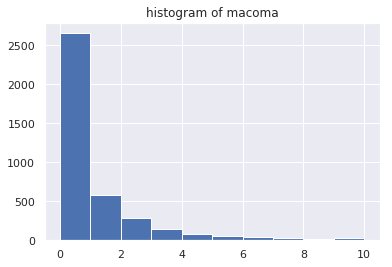

In [410]:
data = pd.read_csv('macoma.csv')

plt.figure()
plt.title('histogram of macoma')
plt.hist(data.macoma, range=(0, 10), bins=10)
plt.show()

Из теоретического домашнего задания вам известен метод поиска оценки максимального правдоподобия параметров распределения. Выпишите готовые формулы:

**Ответ:** 
Пусть $r_0$ - доля нулей
$$\epsilon = \frac{r_0 - e^{-\lambda}}{1 - e^{-\lambda}} \\
\lambda = \frac{\overline{X}(1 - e^{-\lambda})}{1 - r_0}
$$
Будем искать приближенно методом Ньютона уравнение:
$$f(\lambda) = \frac{\overline{X}(1 - e^{-\lambda})}{1 - r_0} - \lambda = 0$$
Тогда $$f'(\lambda) = \frac{\overline{X}e^{-\lambda}}{1 - r_0} - 1$$

Реализуйте метод для выданных данных. Постройте графики траекторий значений параметров в зависимости от номера итерации метода.

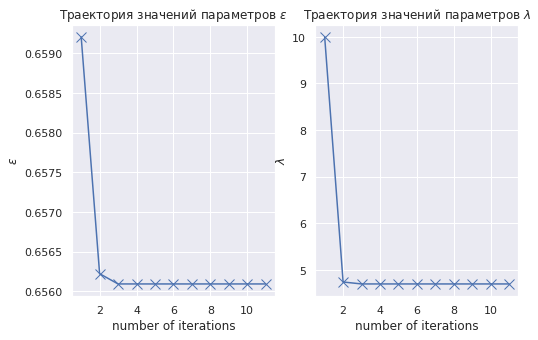

In [539]:
def f(X, l, r_0):
    return X.mean()*(1-np.exp(-l))/(1 - r_0) - l

def der_f(X, l, r_0):
    return X.mean()*np.exp(-l)/(1 - r_0) - 1

def get_eps(l, r_0):
    return (r_0 - np.exp(-l))/(1 - np.exp(-l))

def newton(f, der_f, x0, r_0, iter_num):
    lambdas = list()
    eps = list()
    
    lambdas.append(x0)
    eps.append(get_eps(x0, r_0))
    
    for i in range(iter_num):
        x0 = x0 - f(data.macoma, x0, r_0)/der_f(data.macoma, x0, r_0)
        lambdas.append(x0)
        eps.append(get_eps(x0, r_0))
    return lambdas, eps    
    
r_0 = len(data.macoma[data.macoma == 0]) / len(data.macoma)

lambdas, eps = newton(f, der_f, 10, r_0, 10)

plt.figure(figsize=(8, 5))

plt.subplot(1,2,1)
plt.title(r'Траектория значений параметров $\epsilon$')
plt.xlabel(r'number of iterations')
plt.ylabel(r'$\epsilon$')

plt.plot(np.arange(1, len(eps)+1), eps, marker='x', markersize=10)


plt.subplot(1,2,2)
plt.title(r'Траектория значений параметров $\lambda$')
plt.xlabel(r'number of iterations')
plt.ylabel(r'$\lambda$')

plt.plot(np.arange(1, len(eps)+1), lambdas, marker='x', markersize=10)

plt.show()

Чтобы убедиться, что вы нашли правильное решение, посчитайте значения логарифмической функции правдоподобия по двумерной сетке значений параметров $(\varepsilon, \lambda)$ и найдите максимум, используя функцию `cool_argmax` из предыдущего задания. Сравните его со значением, найденным ранее.

In [482]:
def cool_argmax(array):
    return np.unravel_index(np.argmax(array), array.shape)

In [505]:
from scipy.special import gammaln

def logpdf(X, l, eps):
    pdfs = np.log(1 - eps) + X*np.log(l) -l - gammaln(X+1)
    pdfs[X == 0] = np.log(eps + (1-eps)*np.exp(-l))
    return pdfs

logpdf(data.macoma, 4.7, 0.65)
vect_logpdf = np.vectorize(lambda l, eps :logpdf(data.macoma, l, eps).sum(),
                          signature='(),()->()')


begin_k = 0.01
end_k = 0.99

begin_l = 0.1
end_l = 50

while ( np.sqrt((end_l - begin_l)**2 + (end_k - begin_k)**2) > 2*1e-5 ):
    step_l = (end_l-begin_l)/50.0
    step_k = (end_k-begin_k)/50.0
    
    Lambda, EPS = np.mgrid[begin_l:end_l:step_l, 
                         begin_k:end_k:step_k]
    LikeliHoodF = vect_logpdf(Lambda, EPS)
    
    l = Lambda[cool_argmax(LikeliHoodF)]
    k = EPS[cool_argmax(LikeliHoodF)]
    
    begin_l = l - step_l if l > step_l else 0.1
    end_l = l + step_l if ((l + step_l) < 1e4) else 1e4
    
    begin_k = k - step_k if k > step_k else 0.1
    end_k = k + step_k if ((k + step_k) < 1e4) else 1e4
    
mle_lambda = begin_l
mle_eps = begin_k
print("MLE lambda : ", mle_lambda)
print("MLE epsilon : ", mle_eps)

MLE lambda :  4.70050087936
MLE epsilon :  0.6560942745599999


Распределение с подобранными параметрами сравните с гистограммой. На какой итерации визуально приближение получается наилучшим?

/home/ilya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


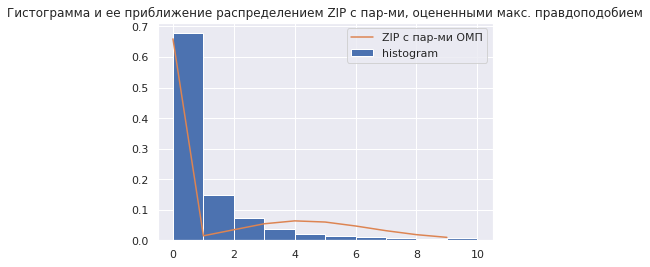

In [555]:
plt.figure()

plt.title("Гистограмма и ее приближение распределением ZIP с пар-ми, \
 оцененными макс. правдоподобием")

plt.hist(data.macoma, range=(0, 10), bins=10, normed=True, label='histogram')
plt.plot(np.arange(0,10), np.exp(logpdf(np.arange(0,10), lambdas[3],eps[3])),
                                                     label='ZIP с пар-ми ОМП')

plt.legend()
plt.show()


**Ответ:** Как мне кажется при выборе подходящего начального приближения (например $\lambda_0 = 2$) уже начиная с третьей итерации получается аппроксимация, а дальше почти ничего не меняется.

Почему при увеличении количества итерации получается плохое приближение? Предложите способ исправить этот недочет и реализуйте его.

**Описание решения:** Здесь очень многое зависит от начальной точки - можно выбрать подходящее (например $\lambda_0 = 2$), тогда он быстро сойдется к правильной точке максимума, и увеличение количества итераций ничего, кроме точности  приближения, не изменит. Но если выбрать например $\lambda_0 = 1$, тогда $\lambda$ будет сходится к нулю, а $\epsilon$ будет очень большим числом - то есть метод Ньютона попадет в локальный экстремум и сойдется к неправильной точке. Поэтому я предлагаю такой вариант выбора начальной точки:

Сначала пройдемся один раз по сетке, то есть сделаем одну итерацию, и таким образом выберем окрестность, в которой будет лежать наш глобальный максимум. И уже из этой окрестности мы выберем нач. точку и применим метод Ньютона.  

**Реализация решения:**

In [558]:
def searchMLE():
    #поиск начального приближение
    Lambda, EPS = np.mgrid[0.01:50:1, 
                             0.01:0.99:0.02]
    LikeliHoodF = vect_logpdf(Lambda, EPS)

    l = Lambda[cool_argmax(LikeliHoodF)]
    #применяем метод Ньютона к нему
    ls, es = newton(f, der_f, l, r_0, 3)
    
    print("MLE lambda : ",ls[-1])
    print("MLE epsilon : ",es[-1])
    
searchMLE()    

MLE lambda :  4.700504240855662
MLE epsilon :  0.6560943095602703


**Ответ (значения оценок параметров):** $\lambda \approx 4.7 ; \epsilon \approx 0.656$

**Вывод:** В данном случае, судя по графикам, приближение методом макс. правдоподобия распределением ZIP оказалось не очень удачным. Кроме того, нельзя было посчитать аналитически уравнение правдоподобия, поэтому пришлось действовать методом Ньютона, который, как известно, капризен относительно выбора начальной точки, и в данном случае был склонен попадать в лок. минимумы. Поэтому сначала мы действовали поиском по сетке для поиска начального приближения, а уже оттуда начали метод Ньютона, и в итоге добились быстрого и верного результата.

__________________
### Задача 6. Image Denoising

В качестве параллельного практического задания вам предлагаются конкурсы на Kaggle по восстановлению зашумленных фотографий семинаристов. Перечислите недостатки предлагаемых подходов и способа оценки качества восстановленного изображения.

**Ответ:** <...>

In [3]:
N =1000
alpha = 0.05
epss = np.linspace(0,1, 100)

crits = list()


for eps in epss:
    sample = (1-eps)*sps.norm().rvs(N) + eps*sps.cauchy().rvs(N)
    crits.append(sample.sum()/np.sqrt(N) > sps.norm().ppf(1-alpha))

print(crits)

[False, False, False, False, True, False, False, True, False, False, True, True, False, True, False, False, True, True, True, True, True, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, False, True, False, False, False, True, True, True, True, True, True, False, True, True, False, True, True, False, True, True, False, False, True, False, False, False, True, False, True, True, True, True, False, True, False, False, False, True, False, False, True, True, False, False, True, False, False, False, False, True, False, True, False, False, False, False, True, False, False]
